In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import qutip
import math
import cmath
# Natural units for particle and atomic physics
c = 1 # speed of light
hbar = 1 # Planck constant
eps0 = 1 # vacuum permittivity
# other parameters
## Fock space dimensions, should be infinite
dim_cavity = 5
dim_env = 40
## cross-sectional area of cavity
sz_cav = 1
## monochromatic laser, average 10 photons, no phase
laser_alpha = math.sqrt(10)
freq_env = 1
freq_cavity = 0.9
## interaction strength between cavity and environment
g_env = 0.05
## Location of the detector, (z - L)
loc_detector = 1

For the sake of intuition, let's first try to measure the length of a cavity.

In [2]:
st_cavity = qutip.states.fock(dim_cavity)
st_env = qutip.states.coherent(dim_env, laser_alpha)
st_sys = qutip.tensor(st_cavity, st_env)

Free Hamiltonians of the cavity and the environment:
$$H_{\textnormal{cav}}=\hbar\omega_\textnormal{cav}\hat{a}^\dag\hat{a}$$
$$H_{\textnormal{env}}=\hbar\omega_\textnormal{env}\hat{b}^\dag\hat{b}$$
Taken from equation 342 of the lecture notes with monochromatic laser

In [3]:
a_cavity = qutip.operators.destroy(dim_cavity)
ad_cavity = qutip.operators.create(dim_cavity)
ham_cavity = hbar * freq_cavity * a_cavity * ad_cavity
b_env = qutip.operators.destroy(dim_env)
bd_env = qutip.operators.create(dim_env)
ham_env = hbar * freq_env * b_env * bd_env

Interaction Hamiltonian from Equation 343:
$$H_\textnormal{int} = i\hbar g (\hat{b}^\dag\hat{a}-\hat{b}\hat{a}^\dag)$$

In [4]:
ham_int = 1j * hbar * g_env * (qutip.tensor(a_cavity, bd_env) - qutip.tensor(ad_cavity, b_env))

In [5]:
id_env = qutip.operators.identity(dim_env)
id_cav = qutip.operators.identity(dim_cavity)
ham_all = qutip.tensor(ham_cavity, id_env) + qutip.tensor(id_cav, ham_env) + ham_int

Output vector potential from Equation 471
$$\hat{A}^{(+)}_\textnormal{out}(z)=-i\sqrt{\frac{\hbar}{4\pi c \varepsilon_0 S \omega_\textnormal{cav}}}\hat{b}e^{i\omega_\textnormal{env}(z-L)/c}$$

In [6]:
vector_potential_plus = -1j * math.sqrt(hbar / (4 * math.pi * c * eps0 * sz_cav)) * b_env * cmath.exp(1j * freq_env * loc_detector / c)
vector_potential_minus = vector_potential_plus.conj()
vector_potential = qutip.tensor(id_cav, vector_potential_plus + vector_potential_minus)

In [7]:
times = np.linspace(0, 35, 1000)
result = qutip.sesolve(ham_all, st_sys, times, [vector_potential])

c:\Users\ethan\Desktop\research\quantum-optics-nonsense\venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ethan\Desktop\research\quantum-optics-nonsense\venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


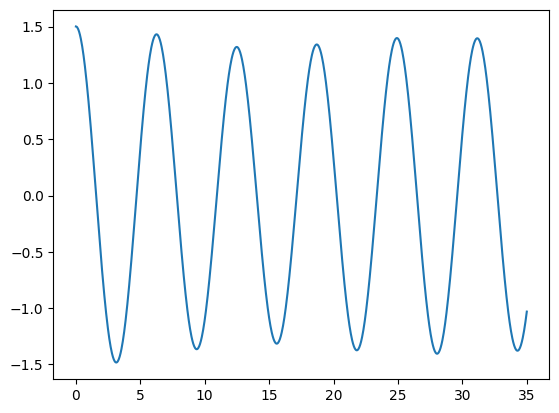

In [8]:
plt.plot(times, result.expect[0])